In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cygnus_lib as cy
import mylib as my
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
from itertools import combinations
import math
%matplotlib inline
x_resolution = y_resolution = 2048
import os
import requests


# Load file and show plots

In [157]:
VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", 
          "x0end", "y0end", "width", "height", "pearson"]
C_file = './data/dbscan_run2273_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_101.txt'
C_file = './data/dbscan_run2277_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_948.txt'
#C_file = './data/dbscan_run2320_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_1003.txt'
#C_file = './data/dbscan_run2318_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_1001.txt'
C_file = './data/dbscan_run2163_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_869_ped_2151.txt'
C_file = './data/dbscan_run2164_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_1000_ped_2151.txt'
#################
C_file = './data/dbscan_run2353_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_1250_ped_2356.txt'
C_file = './data/dbscan_run2354_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_744_ped_2356.txt'
C_file = './data/dbscan_run2357_cmin_0_cmax_300_rescale_576_nsigma_1.5_ev_1000_ped_2358.txt'
C_file = './data/dbscan_run2359_cmin_0_cmax_300_rescale_576_nsigma_1.5_ev_1000_ped_2358.txt'
C_file = './data/dbscan_run1834_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_500_ped_1748.txt'
############### MANGO
#C_file = './data/dbscan_run2322_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_100_ped_2340.txt'
#C_file = './data/dbscan_run2346_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_301_ped_2340.txt'
#C_file = './data/dbscan_run2346_cmin_0_cmax_300_rescale_256_nsigma_1.5_ev_301_ped_2340.txt'
#C_file = './data/dbscan_run2338_cmin_0_cmax_300_rescale_256_nsigma_1.5_ev_203_ped_2340.txt'
#C_file = './data/dbscan_run2338_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_203_ped_2340.txt'
#C_file = './data/dbscan_run2352_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_302_ped_2340.txt'
##############
#C_file = './data/dbscan_run2320_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_1003_ped_2316.txt' # Ambe

df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)

# range
# charge distribution
# charge asimettriy

df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start'])**2)
df['x0c'] = (df['x0end'] + df['x0start'])/2.
df['y0c'] = (df['y0end'] + df['y0start'])/2.


var = C_file.split('/')[-1].split('_')
var_name = []
var_val = []
for i in range(0, len(var)-1, 2):
    var_name.append(var[i:i+1][0])
    var_val.append(var[i+1:i+2][0])
print (var_name, var_val)
from platform import python_version
print ("python version: "+python_version())
var_val[var_name.index("rescale")]

['dbscan', 'cmin', 'cmax', 'rescale', 'nsigma', 'ev', 'ped'] ['run1834', '0', '300', '512', '1.5', '500', '1748.txt']
python version: 3.6.8


'512'

# LEMON/MANGO Parameters

In [158]:
LEMON = True

if LEMON:
    # LEMON
    phKev       = 2045.15/5.9
    pixelscale  = 0.125 
else:
    phKev       = 10000/5.9
    pixelscale  = 0.55 
    
rescale = float(var_val[var_name.index("rescale")])


xyscale = x_resolution/rescale
rescale_pixelscale = xyscale*pixelscale
print("Scale: %d Pixel/Mpixel, %.2f [mm/Mpixel]" % (xyscale, rescale_pixelscale))


Scale: 4 Pixel/Mpixel, 0.50 [mm/Mpixel]


In [159]:
df.head()#[df['cluster_lable']==2]
#df.iloc[:,1:4].head()

,iTr,cluster_lable,pixels,photons,ph_pixels,x0start,y0start,x0end,y0end,width,height,pearson,length,x0c,y0c
0,0.0,-1.0,41.0,201.003222,4.902518,1.0,105.0,498.0,470.0,2.180608,1.801374,0.188763,616.631170,249.5,287.5
1,0.0,0.0,6.0,26.480670,4.413445,136.0,100.0,140.0,102.0,2.125410,1.866182,0.129342,4.472136,138.0,101.0
2,0.0,1.0,5.0,21.320876,4.264175,152.0,95.0,155.0,95.0,1.686802,2.270397,-0.288675,3.000000,153.5,95.0
3,0.0,2.0,5.0,19.951031,3.990206,168.0,88.0,171.0,90.0,2.575107,1.169968,0.657794,3.605551,169.5,89.0
4,0.0,3.0,17.0,121.786727,7.163925,186.0,83.0,194.0,82.0,1.328938,2.496783,-0.558481,8.062258,190.0,82.5


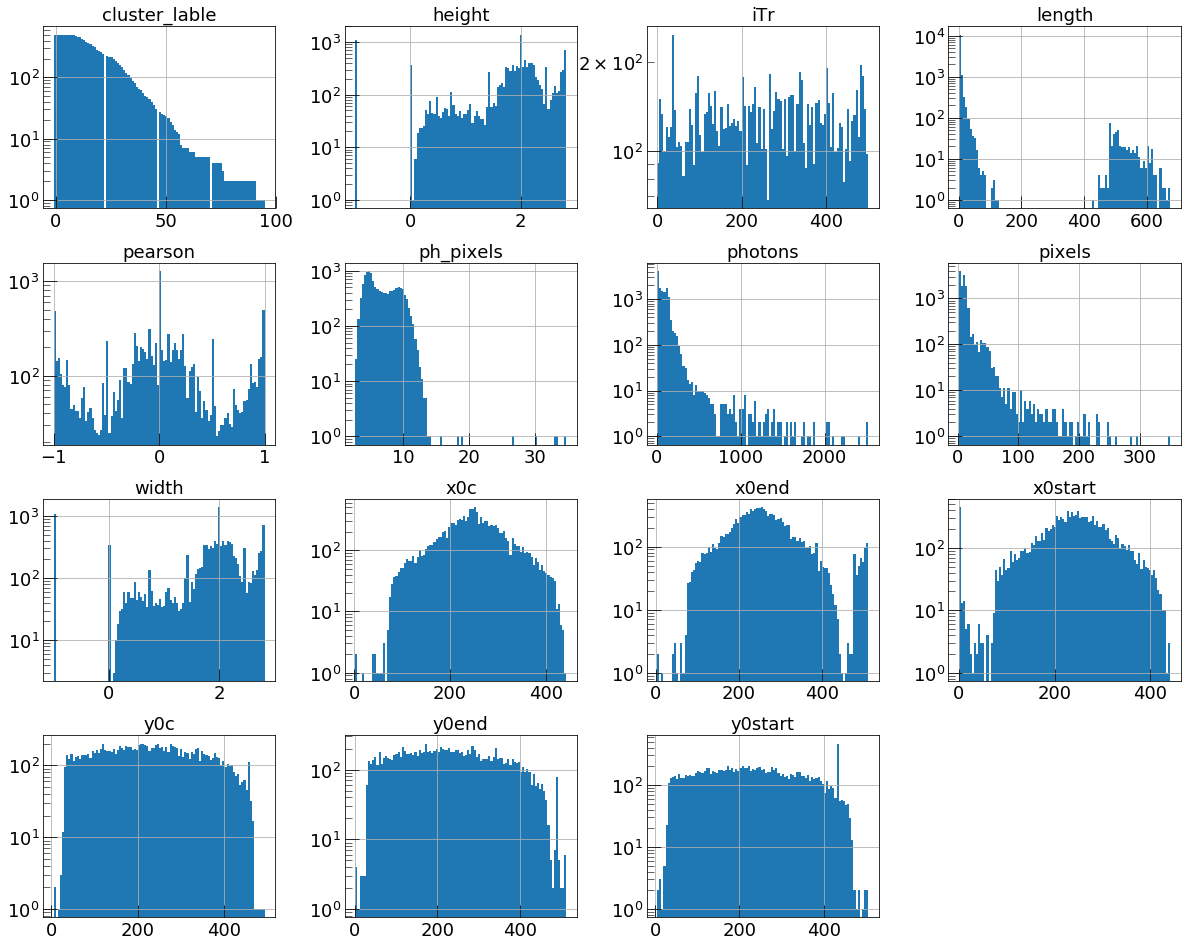

In [160]:
df.hist(bins=100, figsize=(20,15), log=True)
plt.show()

# Custs & Normalizzation

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Fidical Ellips: 100.00, 120.00 [mm]


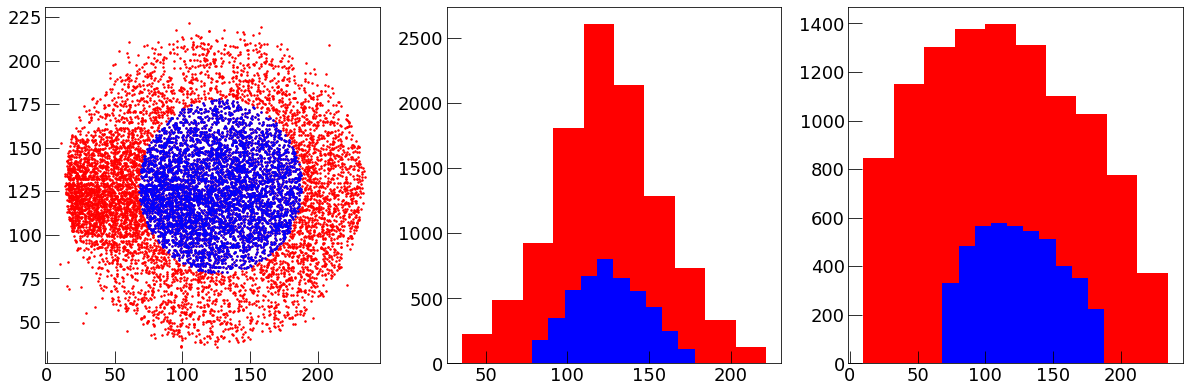

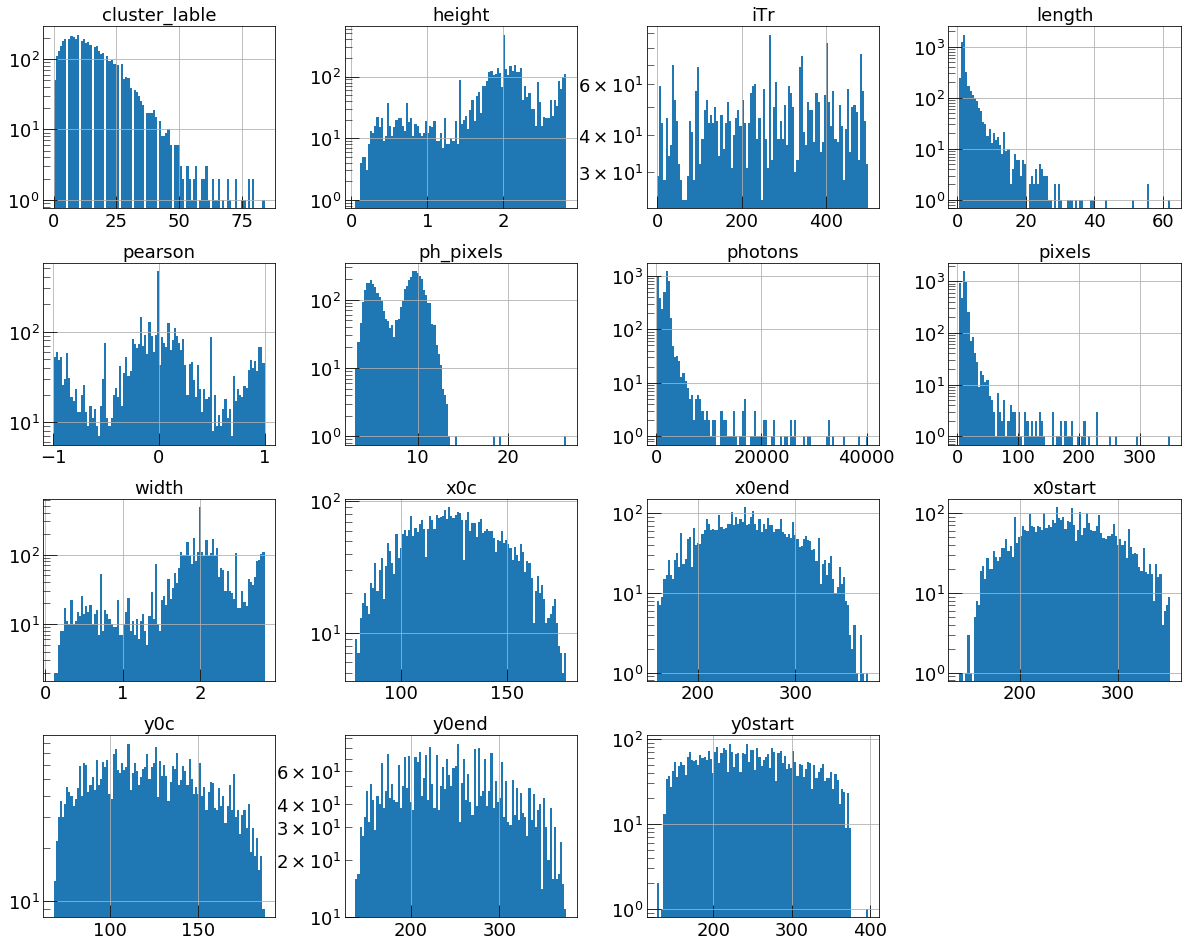

In [161]:


dfc = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0)]

# Normalization
dfc.loc[:,'photons']  =dfc['photons']*xyscale*xyscale
dfc.loc[:,'length']   =dfc['length']*rescale_pixelscale
dfc.loc[:,'x0c']      =dfc['x0c']*rescale_pixelscale
dfc.loc[:,'y0c']      =dfc['y0c']*rescale_pixelscale

# fiducializzation

if LEMON:
    DX = 0 
    DY = 0
    a = 100. # mm
    b = 120. # mm

    a0 = a*0.5
    b0 = b*0.5
    print ("Fidical Ellips: %.2f, %.2f [mm]" % (a,b))

    d0 = x_resolution*pixelscale/2

    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    y = dfc['y0c']
    x = dfc['x0c']
    x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    ax[0].plot(y, x, 'r.', markersize=3)
    ax[0].plot(y1, x1, 'b.', markersize=3)

    ax[1].hist(x, color='r')
    ax[1].hist(x1, color='b')
    ax[2].hist(y, color='r')
    ax[2].hist(y1, color='b')
    plt.show()

    dfc = dfc[((dfc['x0c']-d0)**2/a0**2 + (dfc['y0c']-d0)**2/b0**2 )< 1]

dfc.hist(bins=100, figsize=(20,15), log=True)
plt.show()

39 50 0.785590488679508 3967.19587632 148.41237113440002


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


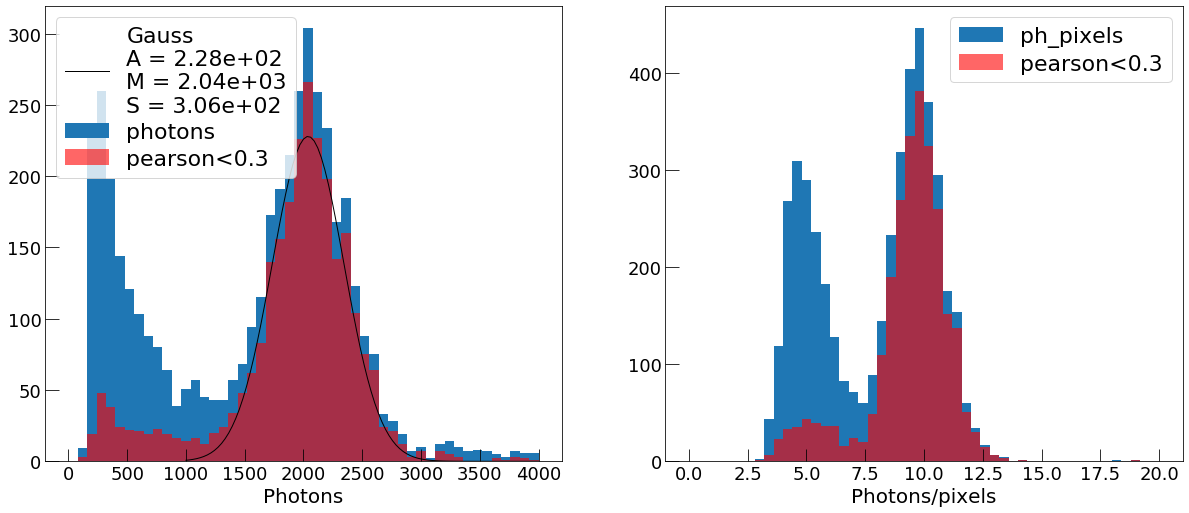

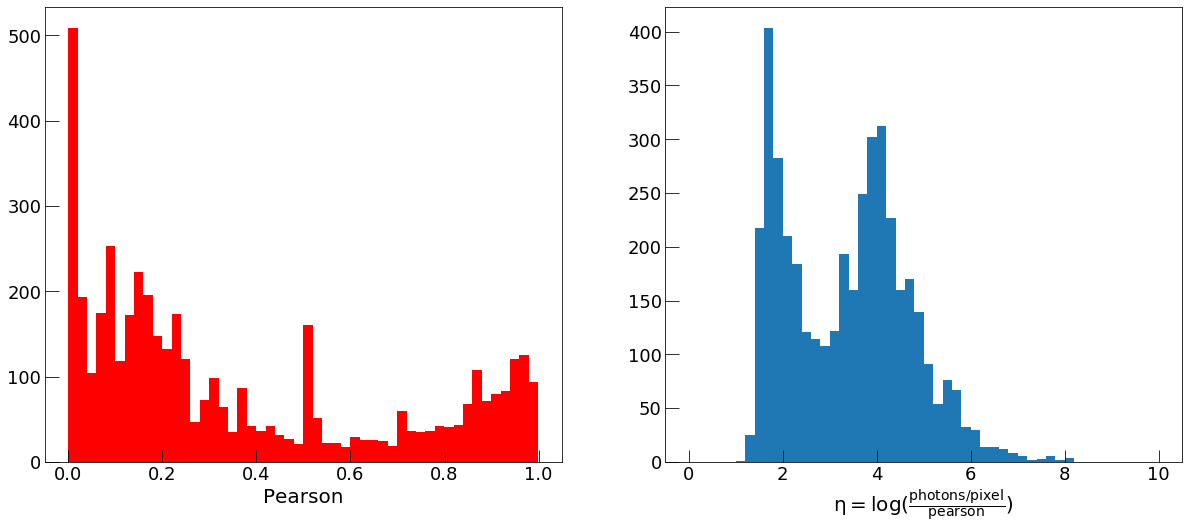

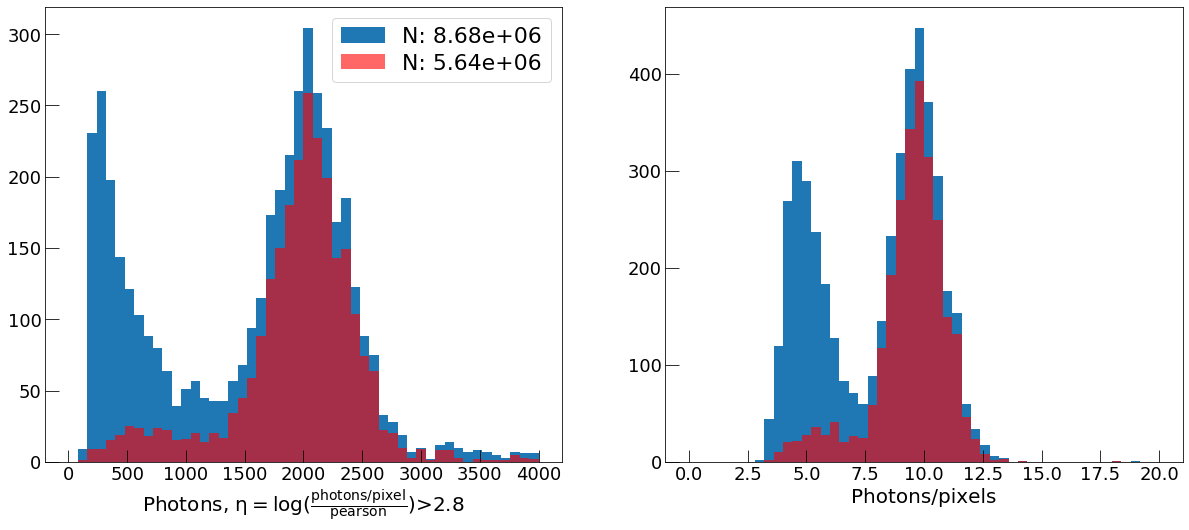

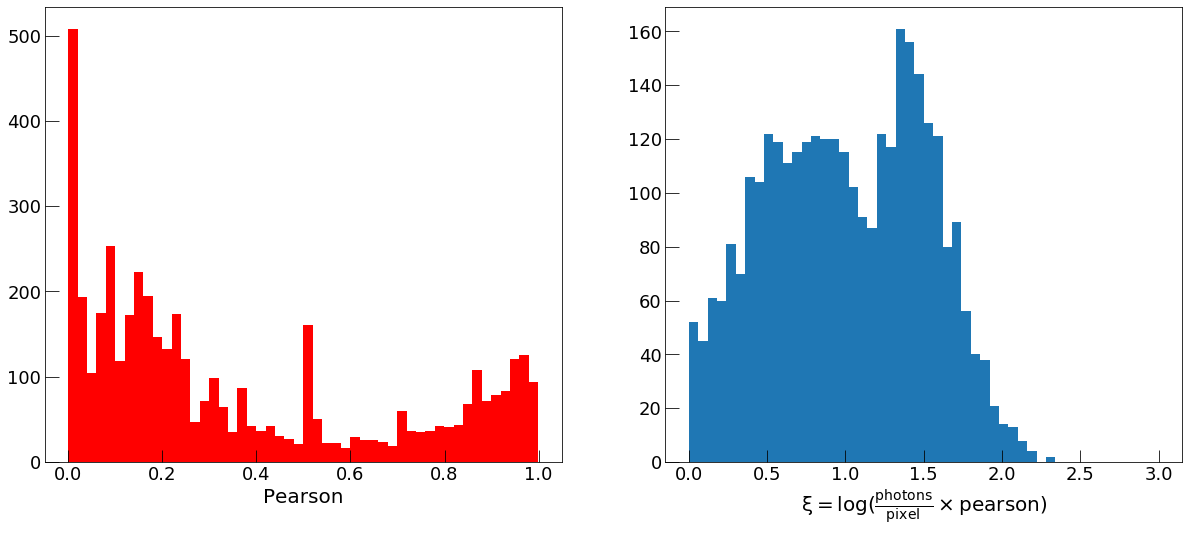

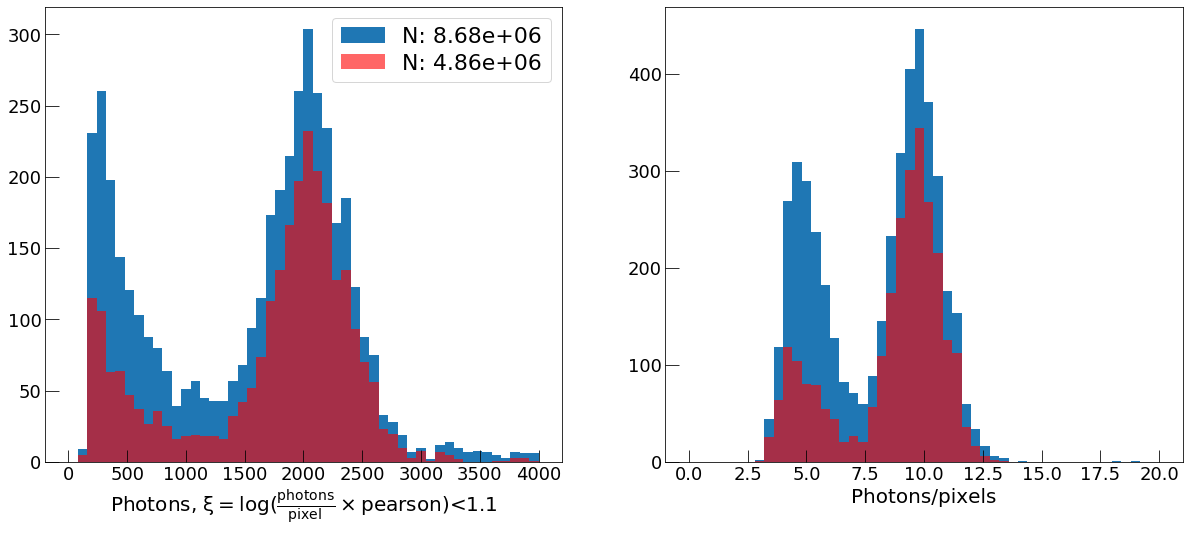

In [297]:
# File Type:
Fe = True
cy.set_atlas_style('square')
from scipy.optimize import curve_fit
if Fe:
    gauss = True
    pearson_cut = 0.3
else:
    gauss = False
    pearson_cut = 0.7
max_range = 4000
max_pearson = 20
fig, ax = plt.subplots(1,2, figsize=(20, 8))
bins=50
ax[0].hist(dfc['photons'], bins=bins, range=(0,max_range))
ax[0].hist(dfc['photons'][abs(dfc['pearson'])<pearson_cut], bins=bins, range=(0,max_range), color='red', 
           alpha=0.6, label = ('pearson<%.1f'%pearson_cut))

ax[0].set_xlabel("Photons")
if gauss:
    cmin    = 1000
    cmax    = 4000
    y = dfc['photons'][abs(dfc['pearson'])<pearson_cut]
    y = y[y<max_range]
    binsf = int(bins*((cmax-cmin)/(y.max()-y.min())))
    print (binsf, bins, (cmax-cmin)/(y.max()-y.min()), y.max(), y.min())
    yh, bins_edge = np.histogram(y, bins=binsf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binsf)
    ye      = 1/np.sqrt(yh)
    #ax[0].errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()

    popt, pcov = curve_fit(my.Gauss3, x, yh, 
                            sigma=ye,
                            absolute_sigma=True,
                            p0=(A, M, S))
    xf = np.linspace(cmin, cmax, 100)
    ax[0].plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (popt[0], popt[1], popt[2]))
    ph_f = popt[1]
    ax[0].legend()
    

ax[0].legend()
ax[1].hist(dfc['ph_pixels'], bins=bins, range=(0,max_pearson))
ax[1].hist(dfc['ph_pixels'][abs(dfc['pearson'])<pearson_cut], bins=bins, color='red', range=(0,max_pearson),
           alpha=0.6, label = ('pearson<%.1f'%pearson_cut))

ax[1].set_xlabel("Photons/pixels")
ax[1].legend()
plt.show()


eta = np.log(dfc['ph_pixels']/abs(dfc['pearson'])[abs(dfc['pearson'])>0])
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].hist(abs(dfc['pearson']), bins=bins, 
           color='r')
ax[0].set_xlabel("Pearson")
ax[1].hist(eta, bins=bins, range=(0,10))
ax[1].set_xlabel(r"$\eta = log (\frac {photons/pixel} {pearson})$")
plt.show()

eta_cut = 2.8
#eta_cut = 1.3
fig, ax = plt.subplots(1,2, figsize=(20, 8))
y = dfc['photons']
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(dfc['photons'], bins=bins, range=(0,max_range), label = "N: %.2e" % SUM)
y = dfc['photons'][eta>eta_cut]
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(y, bins=bins, range=(0,max_range), color='red', 
           alpha=0.6, label = "N: %.2e" % SUM)
ax[0].set_xlabel(r"Photons, $\eta = log (\frac {photons/pixel} {pearson})$>%.1f" % eta_cut)
#ax[1].hist(dfc['photons'][eta>eta_cut], bins=bins, range=(0,max_range), color='black')
ax[1].hist(dfc['ph_pixels'], bins=bins, range=(0,max_pearson))
ax[1].hist(dfc['ph_pixels'][eta>eta_cut], bins=bins, range=(0,max_pearson), color='red', 
           alpha=0.6)
ax[1].set_xlabel("Photons/pixels")

ax[0].legend()

plt.show()

xi = np.log(dfc['ph_pixels']*abs(dfc['pearson'])[abs(dfc['pearson'])>0])
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].hist(abs(dfc['pearson']), bins=bins, 
           color='r')
ax[0].set_xlabel("Pearson")
ax[1].hist(xi, bins=bins, range=(0,3))
ax[1].set_xlabel(r"$\xi = log (\frac {photons} {pixel} \times pearson)$")
plt.show()

xi_cut = 1.1
fig, ax = plt.subplots(1,2, figsize=(20, 8))
y = dfc['photons']
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(y, bins=bins, range=(0,max_range), label = "N: %.2e" % SUM)
y = dfc['photons'][xi<xi_cut]
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(y, bins=bins, range=(0,max_range), color='red', 
           alpha=0.6, label = "N: %.2e" % SUM)
ax[0].set_xlabel(r"Photons, $\xi = log (\frac {photons} {pixel}\times pearson )$<%.1f" % xi_cut)
ax[1].hist(dfc['ph_pixels'], bins=bins, range=(0,max_pearson))
ax[1].hist(dfc['ph_pixels'][xi<xi_cut], bins=bins, range=(0,max_pearson), color='red', 
           alpha=0.6)
ax[1].set_xlabel("Photons/pixels")
ax[0].legend()
plt.show()

Params:  [ 2.36829815e+02 -2.26019774e-03  1.53672271e+02  2.04257690e+03
  3.24851109e+02]
err:  [1.76545258e+01 1.42755821e-04 2.62754488e+00 6.60971089e+00
 6.81548644e+00]


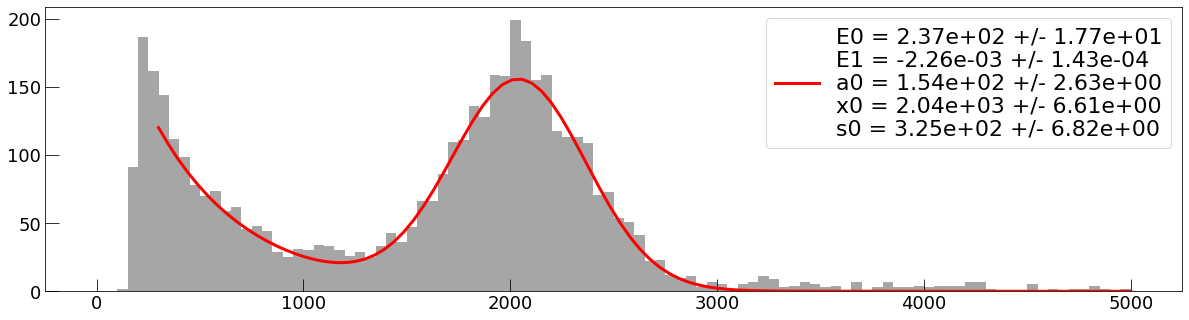

Params:  [ 2.49070426e+03 -1.78756381e+00  7.70420620e+01  4.05521405e+00
  7.35308552e-01]
err:  [1.64001091e+03 3.21089786e-01 2.52337396e+00 3.80210324e-02
 3.80442516e-02]


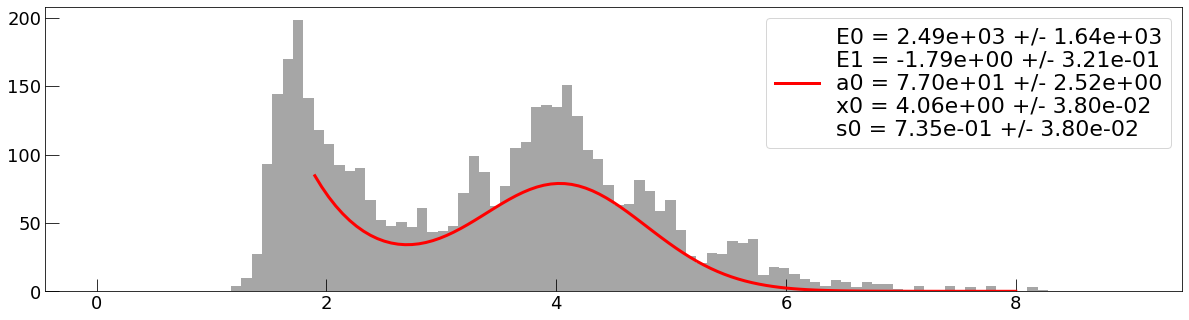

In [292]:
cy.set_atlas_style('long')
def ExpG(x, p0, p1, a0, x0, s0): # power of ten
    import numpy as np
    return p0*np.exp(p1*x) + a0 * np.exp(-(x - x0)**2 / (2 * s0**2))

def myExpG(data, xmin, xmax, bins, E0, E1, a0, x0, s0):
    y = data[(data > xmin) & (data < xmax)]
    binsf = int(bins*((xmax-xmin)/(y.max()-y.min())))
    x=np.linspace(xmin , xmax, binsf)
    yh, _ = np.histogram(y, bins=binsf, range=(xmin,xmax))
    popt, pcov = curve_fit(ExpG, x, yh, 
                            p0=(E0, E1, a0, x0, s0))    
    print ("Params: ", popt) 
    perr = np.sqrt(np.diag(pcov))
    print ("err: ", perr)
    return plt.plot(x, ExpG(x, *popt), 'r-', linewidth=3,
    label='E0 = %.2e +/- %.2e\nE1 = %.2e +/- %.2e\na0 = %.2e +/- %.2e\nx0 = %.2e +/- %.2e\ns0 = %.2e +/- %.2e' % 
                          (popt[0], perr[0],  popt[1],perr[1],
                           popt[2],perr[2], popt[3], perr[3], popt[4], perr[4]))


bins = 100

myExpG(dfc['photons'], 300., 5000., bins, 10000., -0.001, 100., 2000., 300.)
plt.hist(dfc['photons'], bins=bins, range=(0,5000.), color='gray', alpha=0.7)
plt.legend()
plt.show()
myExpG(eta, 1.9, 8., bins, 1000., -0.8, 100., 4., 1.)
plt.hist(eta, bins=bins, range=(0,9), color='gray', alpha=0.7)
plt.legend()
plt.show()

Photons @ 5.9 keV: 2045.1516337693502


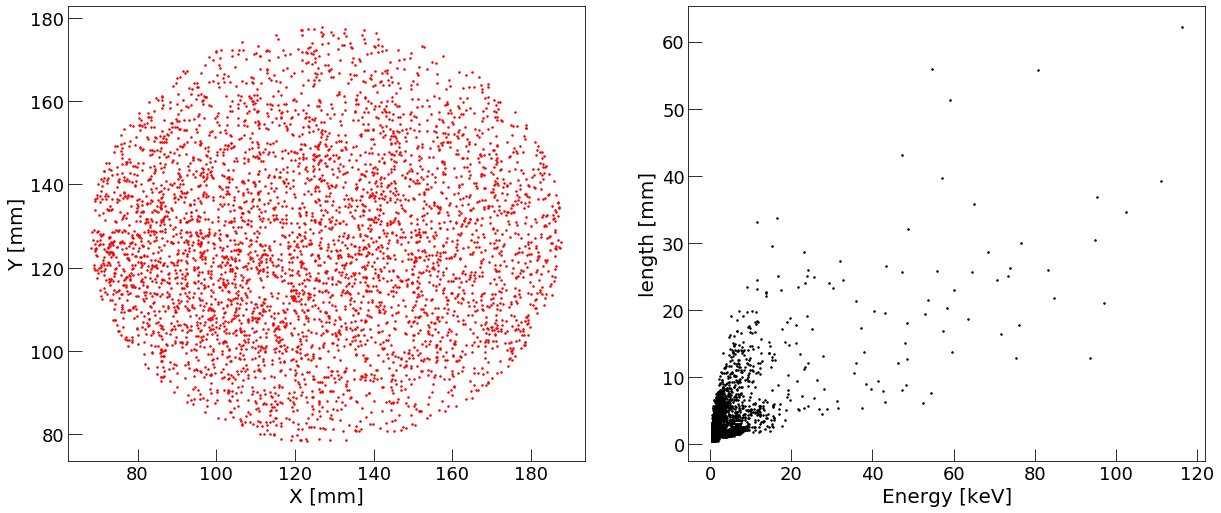

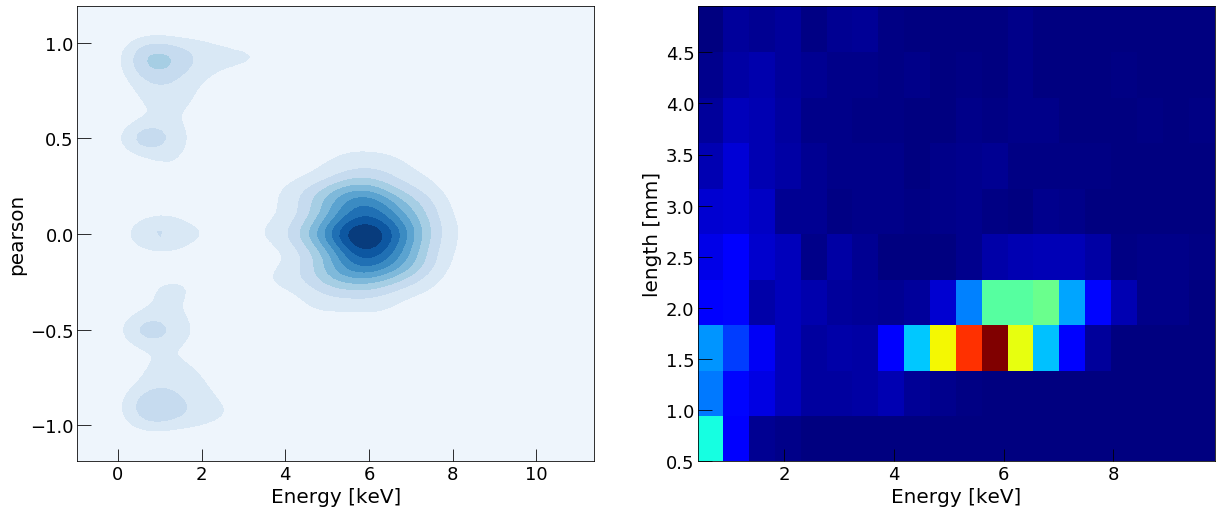

In [286]:
#plt.plot(df['y0start'], df['x0start'], 'k.', markersize=1)
import seaborn as sns
######################
### se lo vuoi dal prcedente fit
if Fe:
    phKev = ph_f/5.9
    print ("Photons @ 5.9 keV: "+str(ph_f))
#####################
y = dfc['y0c']
x = dfc['x0c']
l = dfc['length']
e = dfc['photons']/phKev
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(y, x, 'r.', markersize=3)
ax[0].set_xlabel("X [mm]")
ax[0].set_ylabel("Y [mm]")
ax[1].plot(e, l, 'k.', markersize=3)
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")
plt.show()
fig, ax = plt.subplots(1,2, figsize=(20, 8))
#ax[0].scatter(df['width'],df['height'],df['pixels']/10 )
#ax[0].set_xlabel("width")
#ax[0].set_ylabel("height")
#ax[0].hist2d(e[(e<10)], dfc['pearson'][(e<10)], bins=(10,10), cmap=plt.cm.jet)
sns.kdeplot(e[(e<10)], dfc['pearson'][(e<10)], ax=ax[0], cmap="Blues", shade=True, shade_lowest=True, )
ax[0].set_xlabel("Energy [keV]")
#ax[1].plot(e[e<20], l[e<20], 'k.', markersize=5)
ax[1].hist2d(e[(e<10) & (l<5)], l[(e<10) & (l<5)], bins=(20,10), cmap=plt.cm.jet)
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")
plt.show()

# Analsi comparata
caricamento file, normalizzazione e validazione dei dati: 
1. sia un cluster
2. le dimensioni dell'ellissoide siano maggiori di zero in entramnbe le direzioni

In [129]:
VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", 
          "x0end", "y0end", "width", "height", "pearson"]
#######################
C_file = './data/dbscan_run2320_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_1003_ped_2316.txt' # Ambe
ambe = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
#ambe = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames).replace([np.inf, -np.inf], 5)
########################
C_file = './data/dbscan_run1834_cmin_0_cmax_300_rescale_512_nsigma_1.5_ev_500_ped_1748.txt'
co60 = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
################## Attenzione DATI Co possono essere di altra sorgente (tipo Fe) ##############

ambe['length'] = np.sqrt((ambe['x0end'] - ambe['x0start'])**2 + (ambe['y0end'] - ambe['y0start'])**2)
ambe['x0c'] = (ambe['x0end'] + ambe['x0start'])/2.
ambe['y0c'] = (ambe['y0end'] + ambe['y0start'])/2.

co60['length'] = np.sqrt((co60['x0end'] - co60['x0start'])**2 + (co60['y0end'] - co60['y0start'])**2)
co60['x0c'] = (co60['x0end'] + co60['x0start'])/2.
co60['y0c'] = (co60['y0end'] + co60['y0start'])/2.

ambe.loc[:,'photons']  = ambe['photons']*xyscale*xyscale
ambe.loc[:,'length']   = ambe['length']*rescale_pixelscale
ambe.loc[:,'x0c']      = ambe['x0c']*rescale_pixelscale
ambe.loc[:,'y0c']      = ambe['y0c']*rescale_pixelscale

co60.loc[:,'photons']  = co60['photons']*xyscale*xyscale
co60.loc[:,'length']   = co60['length']*rescale_pixelscale
co60.loc[:,'x0c']      = co60['x0c']*rescale_pixelscale
co60.loc[:,'y0c']      = co60['y0c']*rescale_pixelscale

ambe['energy']         = ambe['photons']/phKev
co60['energy']         = co60['photons']/phKev

ambe = ambe[(ambe['cluster_lable'] > -1) & (ambe['width'] > 0) & (ambe['height'] > 0)]
co60 = co60[(co60['cluster_lable'] > -1) & (co60['width'] > 0) & (co60['height'] > 0)]

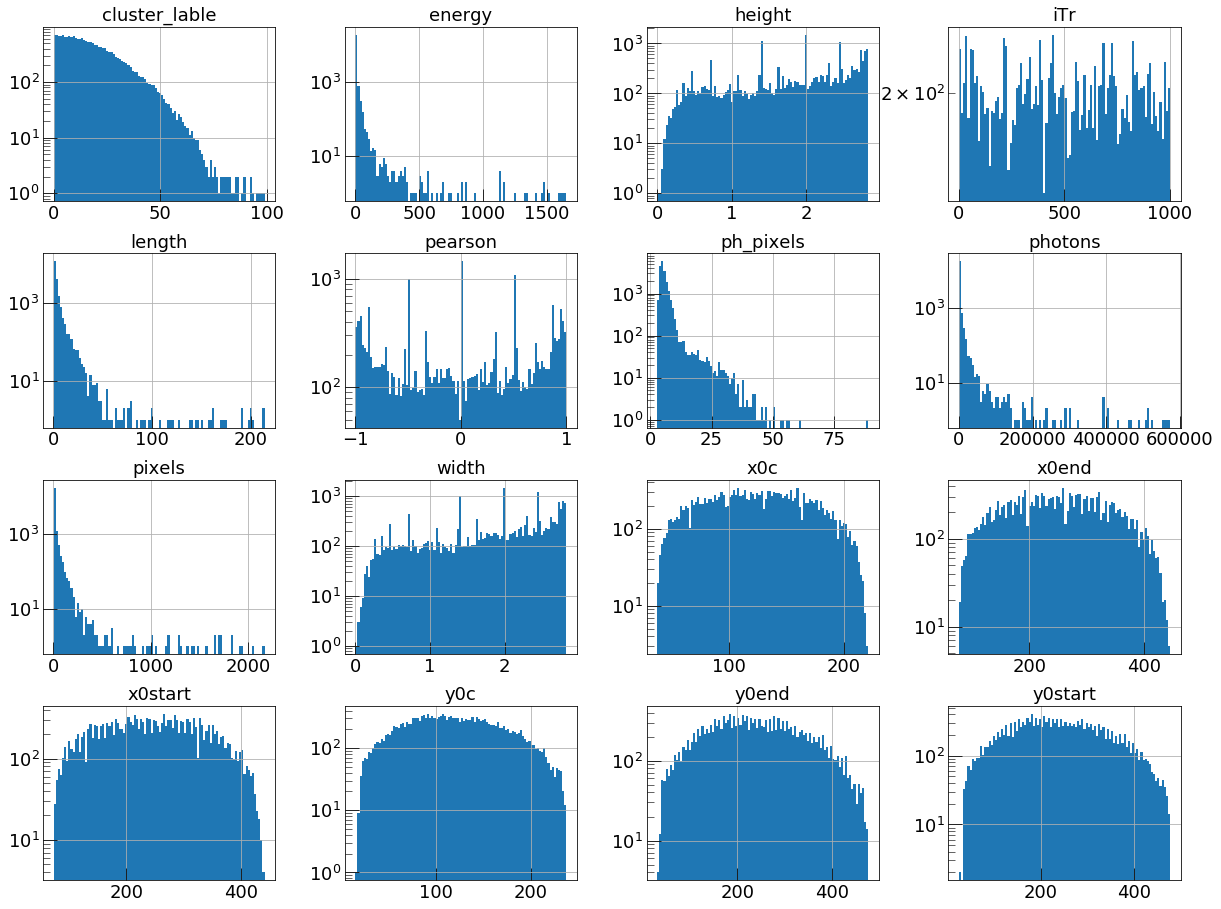

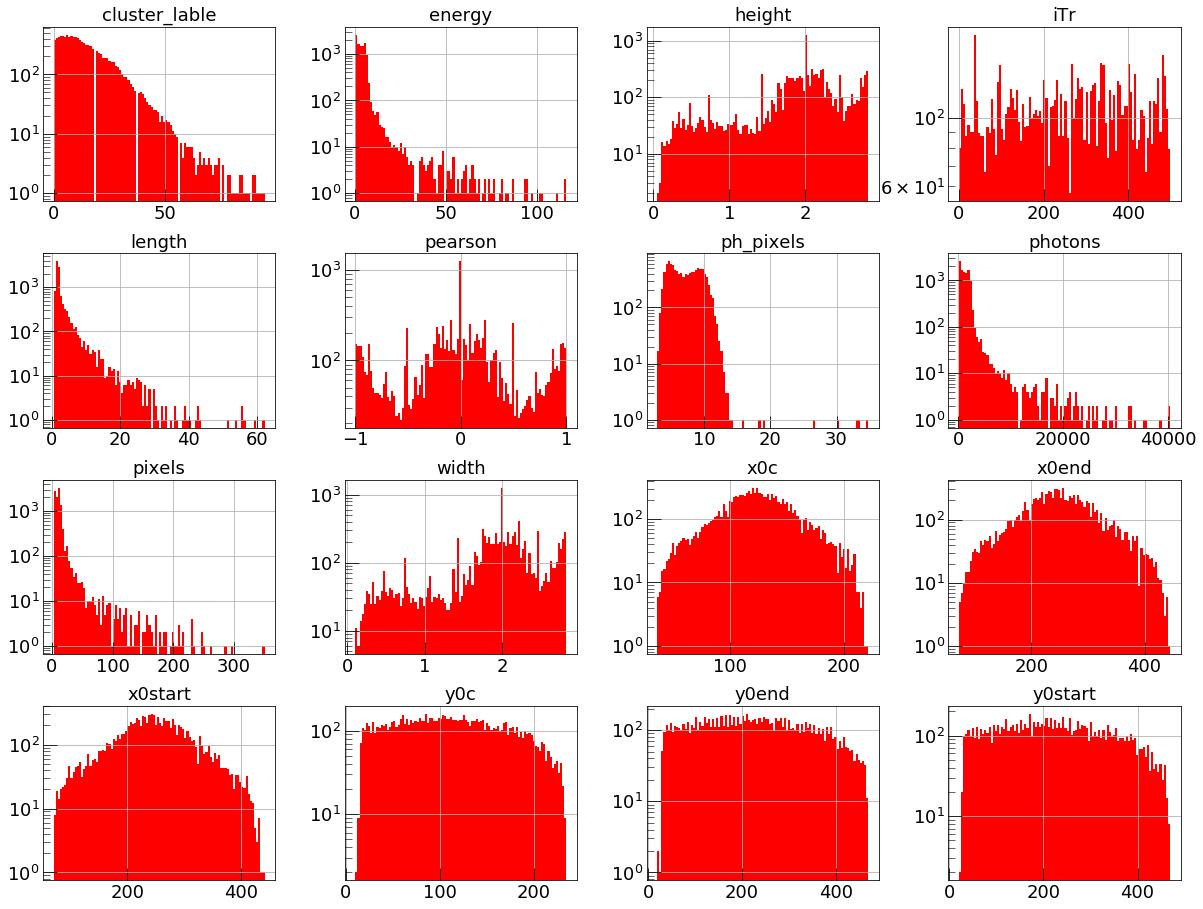

In [130]:
ambe.hist(bins=100, figsize=(20,15), log=True)
plt.show()
co60.hist(bins=100, figsize=(20,15), log=True, color='red')
plt.show()

# Fiducializzazione ellise per LEMON

Fidical Ellips: 60.00, 72.00 [mm]


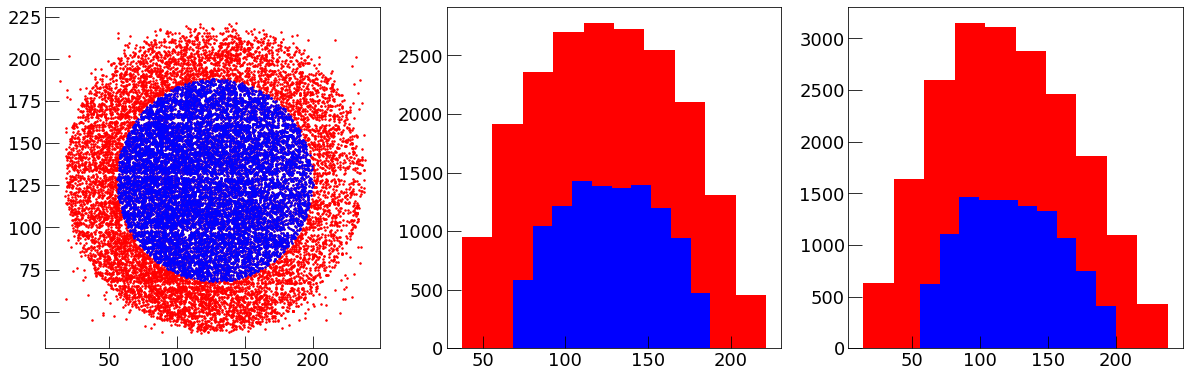

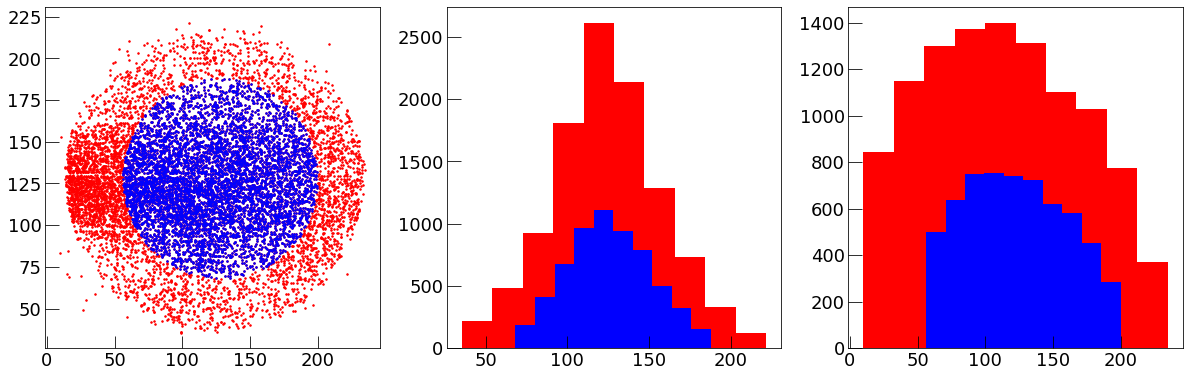

In [135]:
if LEMON:
    DX = 0 
    DY = 0
    a = 100. # mm
    b = 120. # mm

    a0 = a*0.6
    b0 = b*0.6
    print ("Fidical Ellips: %.2f, %.2f [mm]" % (a0,b0))

    d0 = x_resolution*pixelscale/2

    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    y = ambe['y0c']
    x = ambe['x0c']
    x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    ax[0].plot(y, x, 'r.', markersize=3)
    ax[0].plot(y1, x1, 'b.', markersize=3)

    ax[1].hist(x, color='r')
    ax[1].hist(x1, color='b')
    ax[2].hist(y, color='r')
    ax[2].hist(y1, color='b')
    plt.show()

    ambe_f = ambe[((ambe['x0c']-d0)**2/a0**2 + (ambe['y0c']-d0)**2/b0**2 )< 1]

    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    y = co60['y0c']
    x = co60['x0c']
    x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    ax[0].plot(y, x, 'r.', markersize=3)
    ax[0].plot(y1, x1, 'b.', markersize=3)

    ax[1].hist(x, color='r')
    ax[1].hist(x1, color='b')
    ax[2].hist(y, color='r')
    ax[2].hist(y1, color='b')
    plt.show()

    co60_f = co60[((co60['x0c']-d0)**2/a0**2 + (co60['y0c']-d0)**2/b0**2 )< 1]
    

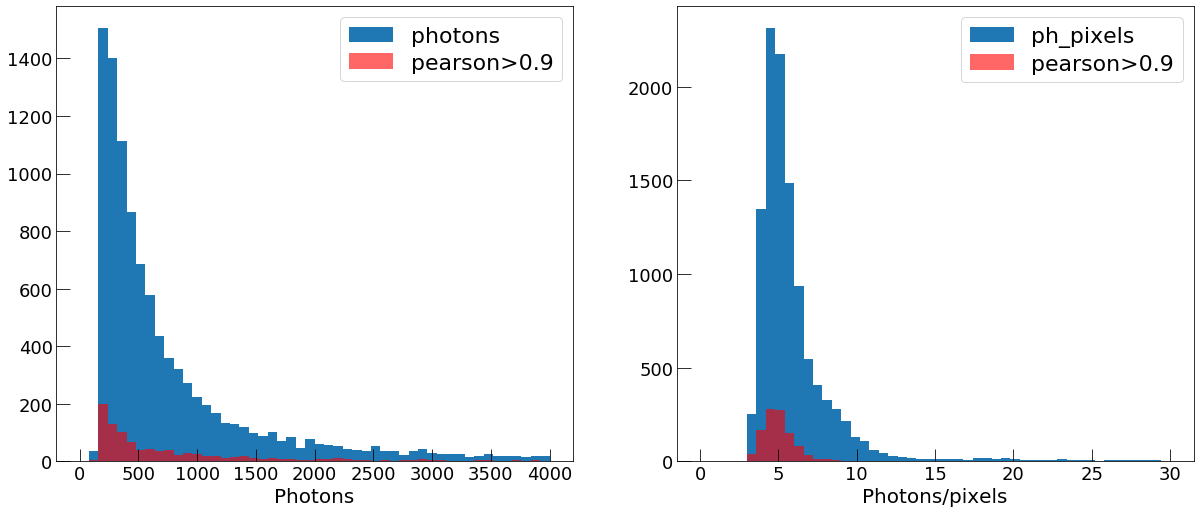

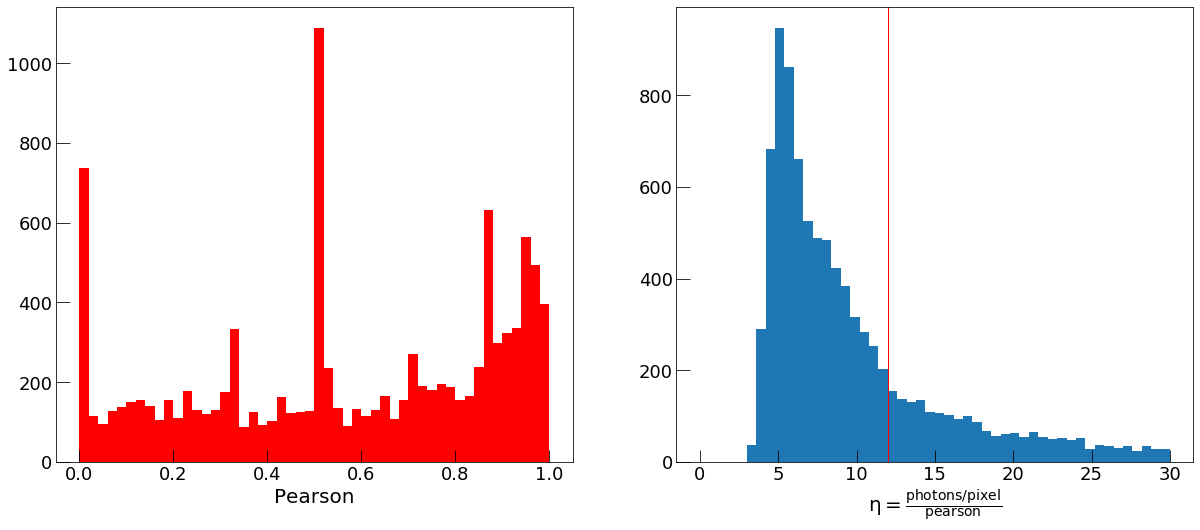

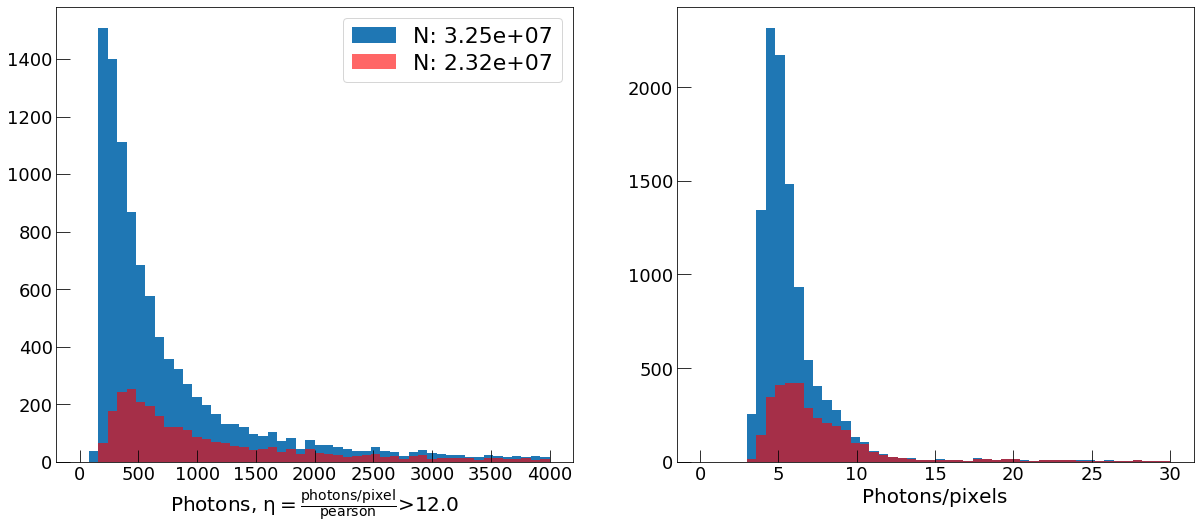

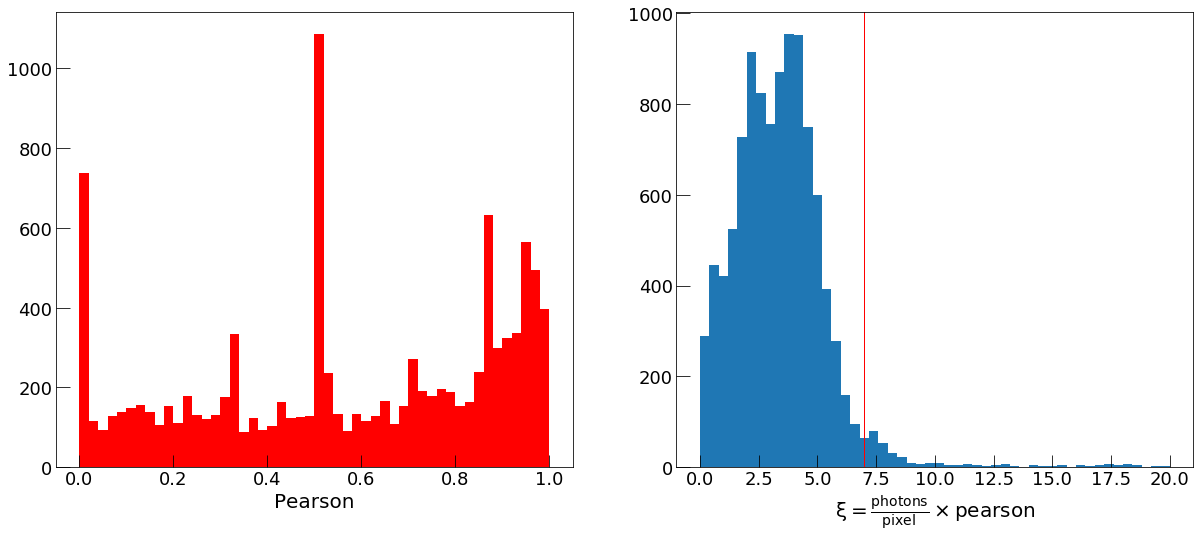

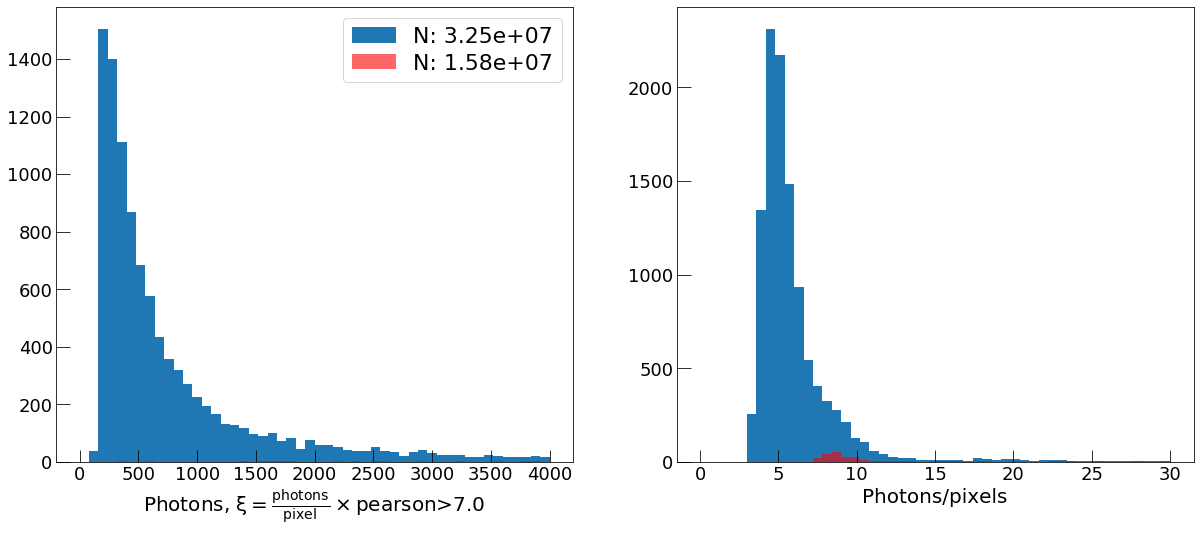

In [321]:
# File Type:
Fe = True
cy.set_atlas_style('square')
from scipy.optimize import curve_fit
gauss = False
pearson_cut = 0.95
max_range = 4000
max_pearson = 30
fig, ax = plt.subplots(1,2, figsize=(20, 8))
bins=50
ax[0].hist(ambe_f['photons'], bins=bins, range=(0,max_range))
ax[0].hist(ambe_f['photons'][abs(ambe_f['pearson'])>pearson_cut], bins=bins, range=(0,max_range), color='red', 
           alpha=0.6, label = ('pearson>%.1f'%pearson_cut))

ax[0].set_xlabel("Photons")
if gauss:
    cmin    = 1000
    cmax    = 4000
    y = ambe_f['photons'][abs(ambe_f['pearson'])>pearson_cut]
    y = y[y<max_range]
    binsf = int(bins*((cmax-cmin)/(y.max()-y.min())))
    print (binsf, bins, (cmax-cmin)/(y.max()-y.min()), y.max(), y.min())
    yh, bins_edge = np.histogram(y, bins=binsf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binsf)
    ye      = 1/np.sqrt(yh)
    #ax[0].errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()

    popt, pcov = curve_fit(my.Gauss3, x, yh, 
                            sigma=ye,
                            absolute_sigma=True,
                            p0=(A, M, S))
    xf = np.linspace(cmin, cmax, 100)
    ax[0].plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (popt[0], popt[1], popt[2]))
    ph_f = popt[1]
    ax[0].legend()
    

ax[0].legend()
ax[1].hist(ambe_f['ph_pixels'], bins=bins, range=(0,max_pearson))
ax[1].hist(ambe_f['ph_pixels'][abs(ambe_f['pearson'])>pearson_cut], bins=bins, color='red', range=(0,max_pearson),
           alpha=0.6, label = ('pearson>%.1f'%pearson_cut))

ax[1].set_xlabel("Photons/pixels")
ax[1].legend()
plt.show()


#eta = np.log(ambe_f['ph_pixels']/abs(ambe_f['pearson'])[abs(ambe_f['pearson'])>0])
eta = ambe_f['ph_pixels']/abs(ambe_f['pearson'])[abs(ambe_f['pearson'])>0]

eta_cut = 12
#eta_cut = 1.3

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].hist(abs(ambe_f['pearson']), bins=bins, color='r')
ax[0].set_xlabel("Pearson")
ax[1].hist(eta, bins=bins, range=(0,max_pearson))
plt.axvline(x=eta_cut, color='r')
ax[1].set_xlabel(r"$\eta = \frac {photons/pixel} {pearson}$")
plt.show()


fig, ax = plt.subplots(1,2, figsize=(20, 8))
y = ambe_f['photons']
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(ambe_f['photons'], bins=bins, range=(0,max_range), label = "N: %.2e" % SUM)
y = ambe_f['photons'][eta>eta_cut]
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(y, bins=bins, range=(0,max_range), color='red', 
           alpha=0.6, label = "N: %.2e" % SUM)
#ax[0].set_xlabel(r"Photons, $\eta = log (\frac {photons/pixel} {pearson})$>%.1f" % eta_cut)
ax[0].set_xlabel(r"Photons, $\eta = \frac {photons/pixel} {pearson}$>%.1f" % eta_cut)
#ax[1].hist(ambe_f['photons'][eta>eta_cut], bins=bins, range=(0,max_range), color='black')
ax[1].hist(ambe_f['ph_pixels'], bins=bins, range=(0,max_pearson))
ax[1].hist(ambe_f['ph_pixels'][eta>eta_cut], bins=bins, range=(0,max_pearson), color='red', 
           alpha=0.6)
ax[1].set_xlabel("Photons/pixels")
ax[0].legend()
plt.show()

#xi = np.log(ambe_f['ph_pixels']*abs(ambe_f['pearson'])[abs(ambe_f['pearson'])>0])
xi = ambe_f['ph_pixels']*abs(ambe_f['pearson'])[abs(ambe_f['pearson'])>0]

xi_cut = 7.0

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].hist(abs(ambe_f['pearson']), bins=bins, color='r')
ax[0].set_xlabel("Pearson")
ax[1].hist(xi, bins=bins, range=(0,20))
ax[1].set_xlabel(r"$\xi = \frac {photons} {pixel} \times pearson$")
plt.axvline(x=xi_cut, color='r')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(20, 8))
y = ambe_f['photons']
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(y, bins=bins, range=(0,max_range), label = "N: %.2e" % SUM)
y = ambe_f['photons'][xi > xi_cut]
SUM, A, M, S = np.trapz(y), y.max(), y.mean(), y.std()
ax[0].hist(y, bins=bins, range=(0,max_range), color='red', 
           alpha=0.6, label = "N: %.2e" % SUM)
ax[0].set_xlabel(r"Photons, $\xi = \frac {photons} {pixel}\times pearson$>%.1f" % xi_cut)
ax[1].hist(ambe_f['ph_pixels'], bins=bins, range=(0,max_pearson))
ax[1].hist(ambe_f['ph_pixels'][xi > xi_cut], bins=bins, range=(0,max_pearson), color='red', alpha=0.6)
ax[1].set_xlabel("Photons/pixels")
ax[0].legend()
plt.show()

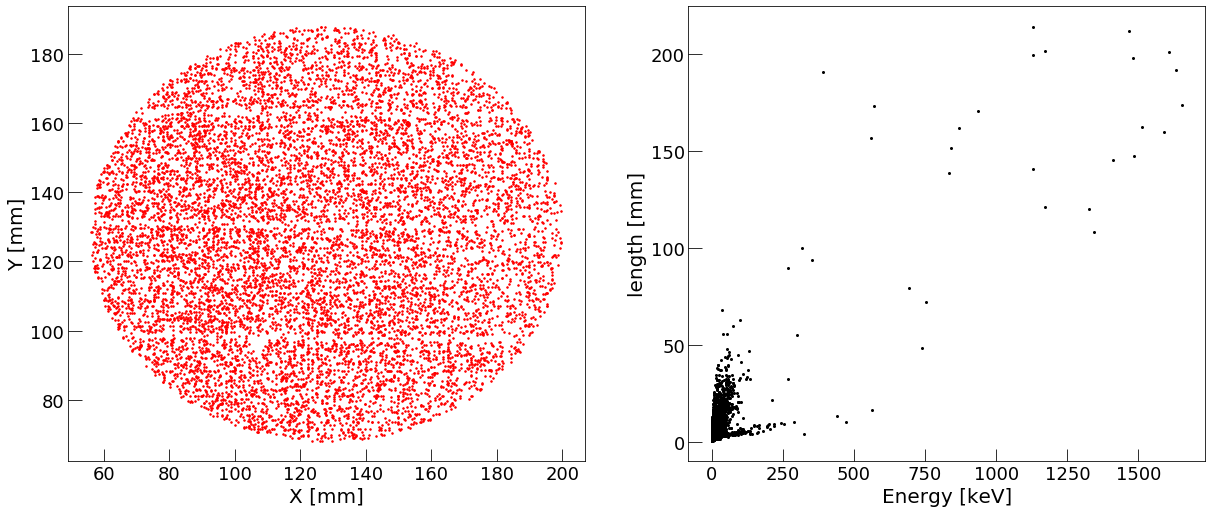

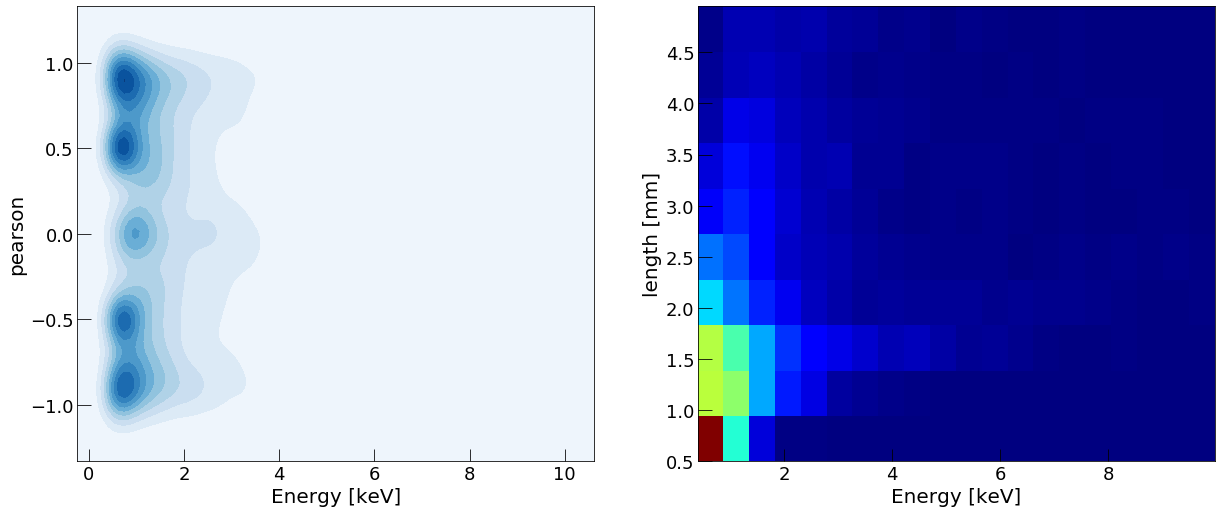

In [322]:
#plt.plot(df['y0start'], df['x0start'], 'k.', markersize=1)
import seaborn as sns
y = ambe_f['y0c']
x = ambe_f['x0c']
l = ambe_f['length']
e = ambe_f['photons']/phKev
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(y, x, 'r.', markersize=3)
ax[0].set_xlabel("X [mm]")
ax[0].set_ylabel("Y [mm]")



ax[1].plot(e, l, 'k.', markersize=4)
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")
plt.show()
fig, ax = plt.subplots(1,2, figsize=(20, 8))
sns.kdeplot(e[(e<10)], ambe_f['pearson'][(e<10)], ax=ax[0], cmap="Blues", shade=True, shade_lowest=True, )
ax[0].set_xlabel("Energy [keV]")
ax[1].hist2d(e[(e<10) & (l<5)], l[(e<10) & (l<5)], bins=(20,10), cmap=plt.cm.jet)
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")
plt.show()

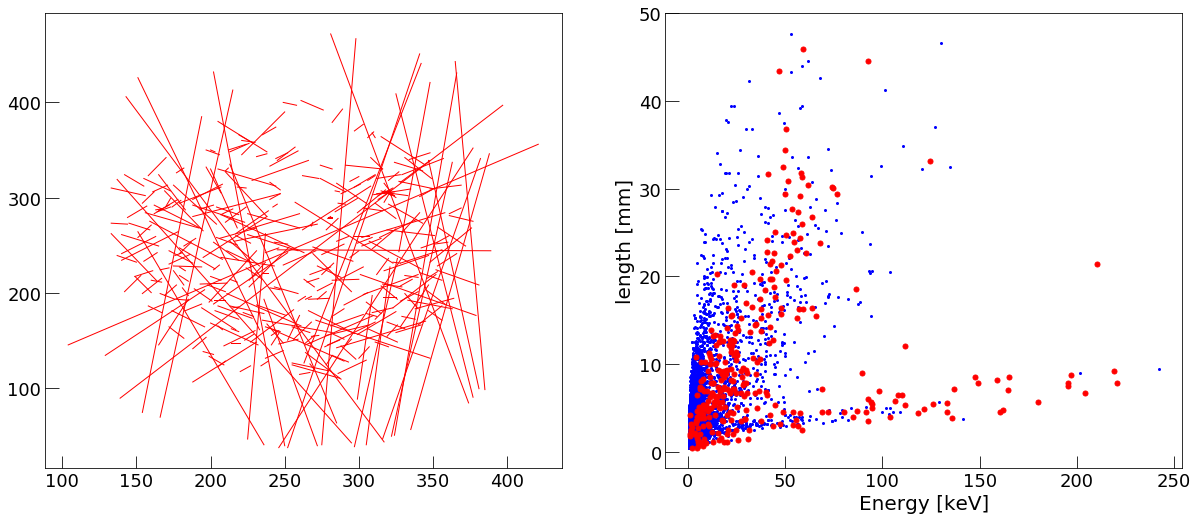

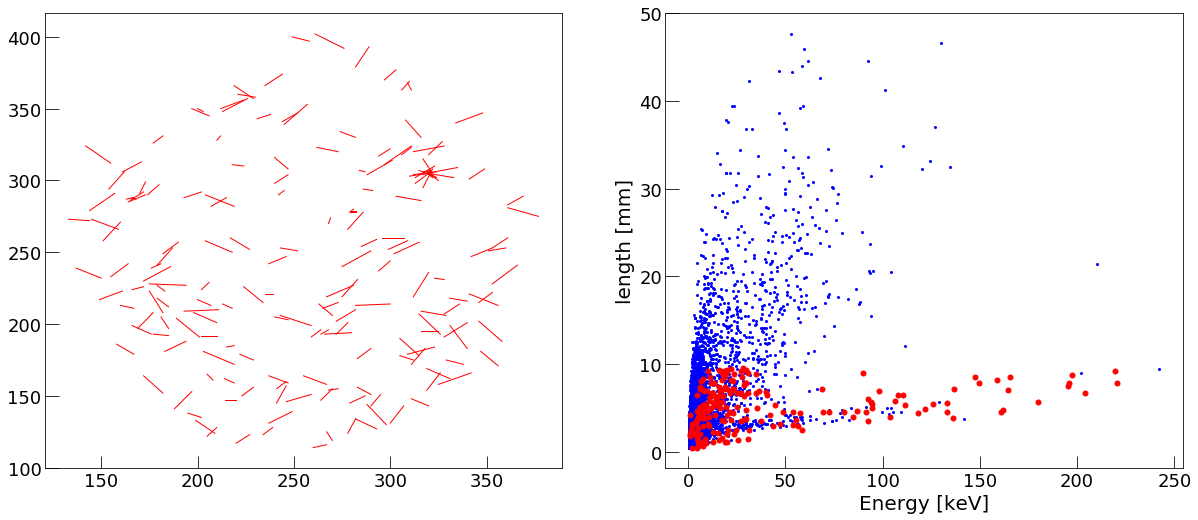

In [335]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot([ambe_f["x0start"][xi>xi_cut], ambe_f["x0end"][xi>xi_cut]], 
           [ambe_f["y0start"][xi>xi_cut], ambe_f["y0end"][xi>xi_cut]], 'r-', markersize=2)
ax[1].plot(e[(e<250) & (l<50)], l[(e<250) & (l<50)], 'b.', markersize=4)

ax[1].plot(e[(xi>xi_cut) & (e<250) & (l<50)], l[(xi>xi_cut) & (e<250) & (l<50)], 'r.', markersize=10)
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")
plt.show()
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot([ambe_f["x0start"][(xi>xi_cut)  & (l<10)], ambe_f["x0end"][(xi>xi_cut) & (l<10)]], 
           [ambe_f["y0start"][(xi>xi_cut) & (l<10)], ambe_f["y0end"][(xi>xi_cut) & (l<10)]], 'r-', markersize=2)
ax[1].plot(e[(e<250) & (l<50)], l[(e<250) & (l<50)], 'b.', markersize=4)

ax[1].plot(e[(xi>xi_cut) & (e<250) & (l<10)], l[(xi>xi_cut) & (e<250) & (l<10)], 'r.', markersize=10)
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")
plt.show()

Tarcce selezionate: 192
Pedestal mean: 99.49, sigma: 0.90, over th. (300) 10
Sigma mean: 2.52, sigma: 2.14, over th. (50) 8
light over Th: 15860820.58 
Open file: ./tmp.21766.root
Find Keys: 2006
# of Images (TH2) Files: 1003 
# of Waveform (TH2) Files: 1003 
# of Images (TH2) Files: 1003 
# of Waveform (TH2) Files: 1003 
192
RUN:  2320 Event:  0
0  >> Close and re-Open:  ./tmp.21766.root
Imege:  1.0


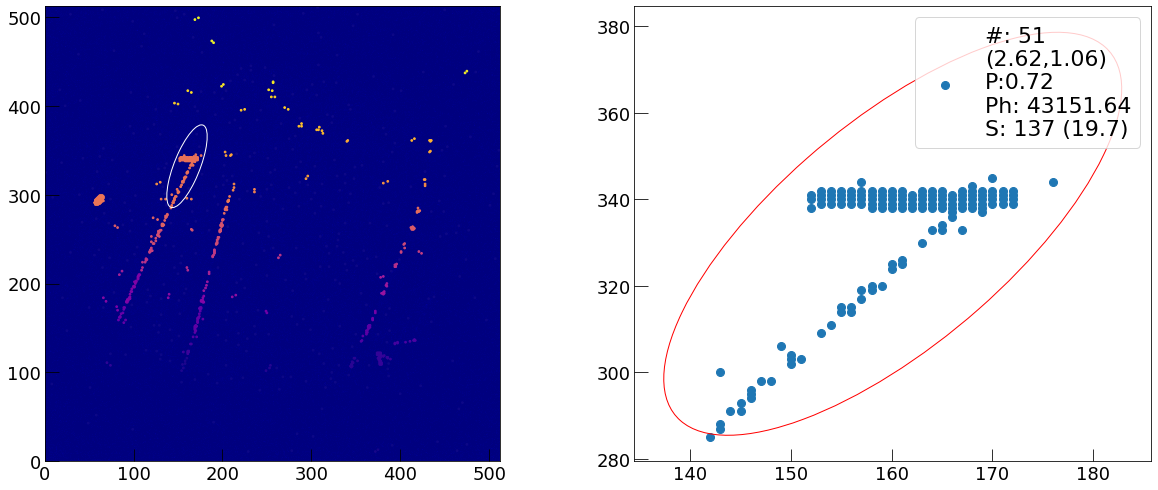

Imege:  5.0


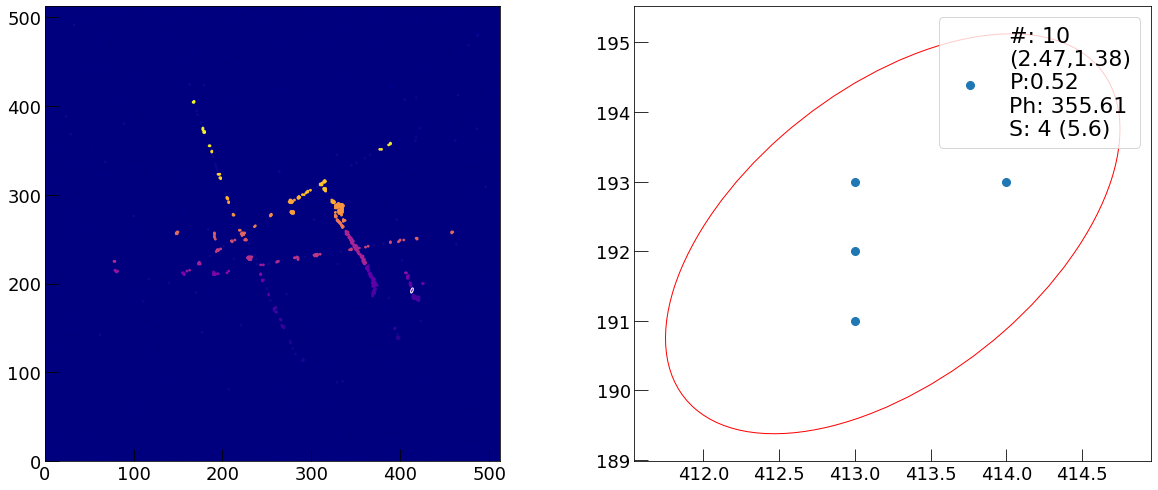

Imege:  18.0


/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/mazzitel/cygnus_lib.py:399: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(x, y)
/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double

ZeroDivisionError: float division by zero

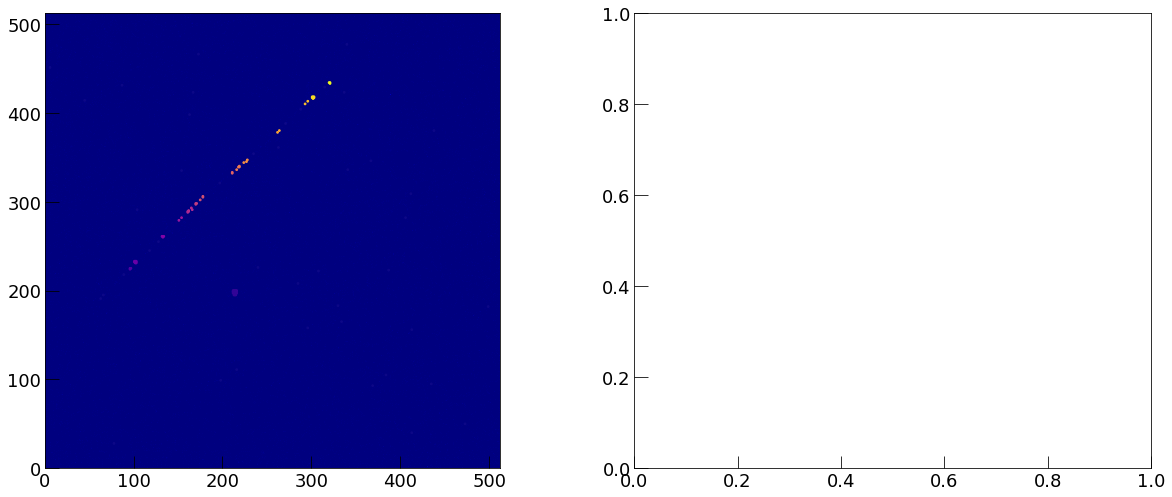

In [336]:
import ROOT
import root_numpy as rtnp
ROOT.gROOT.SetBatch(True)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#iTrC = (ambe[['iTr', 'cluster_lable']])[abs(ambe['pearson'])>p_cor][(eta_ambe>1.5) & (eta_ambe<2)]
iTrC = (ambe_f[['iTr', 'cluster_lable']])[(xi>xi_cut) & (e<250) & (l<10)]
Tr = np.array(iTrC['iTr'])
print ("Tarcce selezionate: %d" % len(iTrC))
ic = np.array(iTrC['cluster_lable'])
dataSelection="LAB"
run = 2320
run_ped       = 2316 
cimax         = 300
cimin         = 0 
dataSelection = 'LAB'
rescale       = 512
nsigma        = 1.5



#########################

try:
    fileoutm = ("./data/run%d_mean.h5" % (run_ped))
    m_image = cy.read_image_h5(fileoutm)
    PedOverMax = m_image[m_image > cimax].size
    print ("Pedestal mean: %.2f, sigma: %.2f, over th. (%d) %d" % 
       (m_image[m_image<cimax].mean(), 
        np.sqrt(m_image[m_image<cimax].var()), cimax,
        (m_image>cimax).sum()))
except:
    print ("No Pedestal file for run %s, run script runs-pedestals.ipynb" % run_ped)
    print ("STOP")

    
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run_ped))
    s_image = cy.read_image_h5(fileouts)
    print ("Sigma mean: %.2f, sigma: %.2f, over th. (50) %d" % 
   (s_image[s_image<50].mean(), 
    np.sqrt(s_image[s_image<50].var()), 
    (s_image>50).sum()))
except:
    print ("No Sigma file for run %s, run script runs-pedestals.ipynb" % run_ped)
    print ("STOP")

#########################
th_image   = np.round(m_image + nsigma*s_image)
print ("light over Th: %.2f " % (th_image.sum()-m_image.sum()))

try:
#    print ('Download and open file: '+cy.swift_root_file(dataSelection, run))
#    tmp_file = cy.swift_download_file(cy.swift_root_file(dataSelection, run))
    print ('Open file: '+tmp_file)
    f  = ROOT.TFile.Open(tmp_file);
    print ('Find Keys: '+str(len(f.GetListOfKeys())))
    pic, wfm = cy.root_TH2_name(f)
    max_image = len(pic)
    max_wfm = len(wfm)
    print ("# of Images (TH2) Files: %d " % (max_image))
    print ("# of Waveform (TH2) Files: %d " % (max_wfm))
    nImag=max_image
except:
    print ("ERROR: No file %d" % (run))

print ("# of Images (TH2) Files: %d " % (max_image))
print ("# of Waveform (TH2) Files: %d " % (max_wfm))
print (len(Tr))
for iTr in range(0, len(Tr)):

    if iTr % 10 == 0:
        print ('RUN: ', run, 'Event: ', iTr)
        print (iTr, ' >> Close and re-Open: ', tmp_file)
        f.Close()
        f  = ROOT.TFile.Open(tmp_file);

    image = rtnp.hist2array(f.Get(pic[iTr])).T
    #image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, Tr[iTr]))
    fig, ax = plt.subplots(1,2, figsize=(20, 8))
    rebin_image     = cy.rebin(image-m_image, (rescale, rescale))  
    rebin_th_image  = cy.rebin((th_image-m_image), (rescale, rescale))
    edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
    points          = np.array(np.nonzero(edges)).T.astype(float) 
    scaler          = StandardScaler()
    X_scaled        = scaler.fit_transform(points)

    dbscan          = DBSCAN(eps=0.05, min_samples = 2)
    dbscan.fit(points)

    clusters = dbscan.fit_predict(X_scaled)

    print ('Imege: ', Tr[iTr])
    ax[0].imshow(rebin_image, vmin=cimin, vmax=cimax, cmap='jet')
    ax[0].scatter(points[:,1], points[:,0], s=3, c=dbscan.labels_, cmap="plasma")
    ax[0].set_xlim(0,rescale)
    ax[0].set_ylim(0,rescale)
    
    yc = points[:,1][dbscan.labels_==ic[iTr]]
    xc = points[:,0][dbscan.labels_==ic[iTr]]
    el_plt, el_par = cy.confidence_ellipse(yc, xc, ax[0], edgecolor='white')
    el_plt, el_par = cy.confidence_ellipse(yc, xc, ax[1], edgecolor='red')
    ph, dim = cy.cluster_par(yc, xc, rebin_image)
    width, height, pearson = cy.confidence_ellipse_par(yc, xc)
    ax[1].scatter(yc, xc, 
                                   label = ('#: %d\n(%.2f,%.2f)\nP:%.2f\nPh: %.2f\nS: %d (%.1f)' %
                                    (ic[iTr], width, height, pearson, ph*xyscale*xyscale, dim, ph/dim)))
    ax[1].legend()
    plt.show()

In [ ]:
Tr = np.array(iTrC['iTr'])
Tr[0]

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].hist(np.log(ambe['ph_pixels']/(ambe['length'][ambe['length']>0])), bins=100, 
           color='b', label='AmBe')
ax[0].hist(np.log(co60['ph_pixels']/(co60['length'][co60['length']>0])), bins=100, 
           color='r', alpha=0.6, label='Co60')

ax[0].set_xlabel("pearson")
ax[0].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")
ax[1].hist(np.log(ambe['ph_pixels']/abs(ambe['pearson'])[ambe['pearson']>0]), bins=100, 
           color='b', label='AmBe', range=(0, 10))
ax[1].hist(np.log(co60['ph_pixels']/abs(co60['pearson'])[co60['pearson']>0]), bins=100, 
           color='r', alpha=0.6, label='Co60', range=(0, 10))
ax[1].set_xlabel(r"$\eta = log (\frac {photons/pixel} {pearson})$")
ax[0].legend()
ax[1].legend()
#ax[1].set_ylabel("ph_pixels")
plt.show()
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(abs(ambe['pearson']), ambe['length']*rescale_pixelscale, 'b.', label='AmBe')
ax[0].plot(abs(co60['pearson']), co60['length']*rescale_pixelscale, 'r.', label='Co60')
ax[0].set_xlabel(r"pearson")
ax[0].set_ylabel(r"length [mm]")
ax[1].plot(abs(ambe['pearson']),np.log(ambe['ph_pixels']/(ambe['length'][ambe['length']>0]*rescale_pixelscale)), 
           'b.', label='AmBe')
ax[1].plot(abs(co60['pearson']),np.log(co60['ph_pixels']/(co60['length'][co60['length']>0]*rescale_pixelscale)), 
           'r.', alpha=0.6, label='Co60')
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
ambe_h, ambe_bins = np.histogram(np.log(ambe['ph_pixels']/(ambe['length'][ambe['length']>0])), 
                            bins=24, range=(0,6))
co60_h, co60_bins = np.histogram(np.log(co60['ph_pixels']/(co60['length'][co60['length']>0])), 
                            bins=24, range=(0,6))

In [ ]:
plt.bar(ambe_bins[:-1], ambe_h, width=0.1, color='b')
plt.bar(co60_bins[:-1], co60_h, width=0.1, color='r', alpha=0.6)
plt.plot((3.95, 3.95), (0,1500), 'g')
plt.xlim(0,6)
plt.show()

In [ ]:
co60_bins[:-1][co60_h==0]

In [ ]:
co60_bins

In [ ]:
#np.where(co60_bins==3.95)[0][0]
print("Contminazione: ", co60_h[co60_bins[:-1]>3.95].sum()/ambe_h[ambe_bins[:-1]>3.95].sum())

In [ ]:
co60_h_cut=np.copy(co60_h)
co60_h_cut[co60_bins[:-1]>3.95]=0

In [ ]:
detec_eff = (ambe_h[ambe_h>0]-co60_h[ambe_h>0])/ambe_h[ambe_h>0]
detec_eff_cut = (ambe_h[ambe_h>0]-co60_h_cut[ambe_h>0])/ambe_h[ambe_h>0]

detec_bins = ambe_bins[:-1][ambe_h>0]
plt.plot(detec_bins, detec_eff_cut, color='k')
plt.plot(detec_bins, detec_eff, color='r')
plt.xlim(3,5)
plt.show()

In [ ]:
len(detec_eff)

In [ ]:
np.exp(3.95)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].bar(ambe_bins[:-1], ambe_h, width=0.1, color='b', label='AmBe')
ax[0].bar(co60_bins[:-1], co60_h, width=0.1, color='r', alpha=0.6, label='Co60')
ax[0].plot((3.95, 3.95), (0,1500), 'g')
ax[0].set_xlim(0,5)
ax[0].legend()
ax[1].plot(detec_bins, detec_eff_cut, color='k', label=r'cut $\eta < 3.95$')
ax[1].plot(detec_bins, detec_eff, color='r', label='all data')
ax[1].set_xlim(3,5)
ax[1].legend()
ax[0].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")
ax[1].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")
plt.show()

In [ ]:
d = np.linspace(0, 80, 80)
lenght = d/np.exp(3.95)

In [ ]:
plt.plot(lenght, d)
plt.xlabel(r"length [mm]")
plt.ylabel(r"density [ph/pixel]")
plt.show()